In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('../A3_datasets/fashion-mnist_train.csv', delimiter=',').to_numpy()
test_data = pd.read_csv('../A3_datasets/fashion-mnist_test.csv', delimiter=',').to_numpy()

In [3]:
X_train_full, y_train_full = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

In [4]:
# define a function to plot a grid of images
def plot_images(X, y, class_labels):
    plt.figure(figsize=(10, 10))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        idx = np.random.randint(0, len(X))
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')

        # access the class label using the integer value
        plt.title(class_labels[int(y[idx])])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

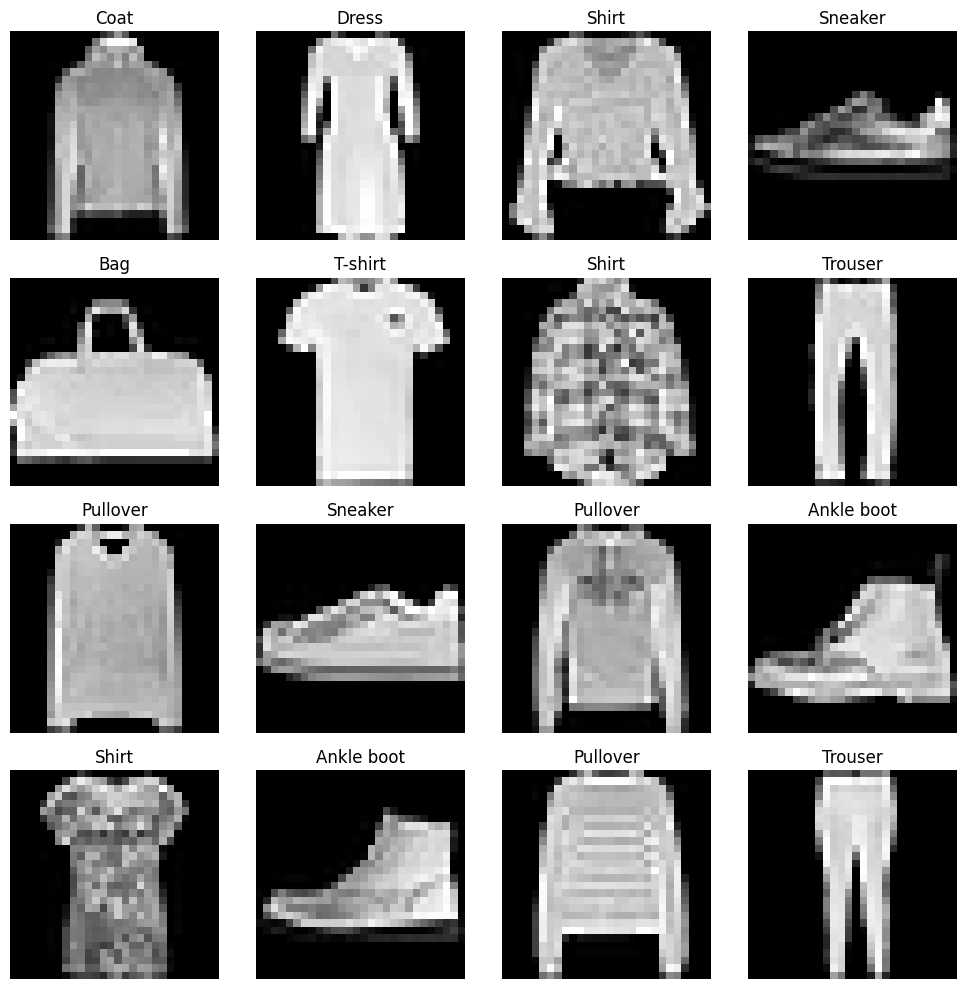

In [5]:
# define class labels
class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 16 random samples from the training set
plot_images(X_train_full, y_train_full, class_labels=class_labels)

2. Train a multilayer perceptron to achieve as good accuracy as you can. There are numerous hyperparameters that we discussed in class which you can tweak, for instance: learning rate, number of and size of hidden layers, activation function and regularization (e.g. Ridge (known here as L2), and early stopping). You should make a structured search for the best hyperparameters that you can find.

In [6]:
# define a smaller dataset to find the best hyperparameters
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, test_size=0.9, random_state=42)

In [7]:
# define the hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [64, 128, 256, 512],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh', 'logistic']
}

# define the MLP classifier
mlp = MLPClassifier(solver='sgd', 
                    alpha=1e-5, 
                    max_iter=200, 
                    verbose=True, 
                    early_stopping=True, 
                    validation_fraction=0.1)

# perform grid search
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Train the final model with the best hyperparameters on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the final model on the testing set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Iteration 1, loss = 1.85107221
Validation score: 0.643333
Iteration 2, loss = 1.18429707
Validation score: 0.715000
Iteration 3, loss = 0.96270287
Validation score: 0.736667
Iteration 4, loss = 0.85088836
Validation score: 0.743333
Iteration 5, loss = 0.77558524
Validation score: 0.756667
Iteration 6, loss = 0.72217560
Validation score: 0.760000
Iteration 7, loss = 0.68069267
Validation score: 0.780000
Iteration 8, loss = 0.64835736
Validation score: 0.766667
Iteration 9, loss = 0.61888583
Validation score: 0.771667
Iteration 10, loss = 0.59442967
Validation score: 0.780000
Iteration 11, loss = 0.57212135
Validation score: 0.785000
Iteration 12, loss = 0.55520994
Validation score: 0.778333
Iteration 13, loss = 0.53600265
Validation score: 0.786667
Iteration 14, loss = 0.52196036
Validation score: 0.781667
Iteration 15, loss = 0.51371839
Validation score: 0.795000
Iteration 16, loss = 0.49450442
Validation score: 0.781667
Iteration 17, loss = 0.48396155
Validation score: 0.791667
Iterat

3. Plot the confusion matrix. Which are the easy/hard categories to classify? Are there any particular classes that often gets mixed together?

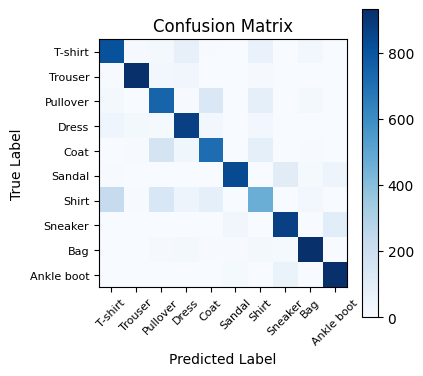

In [8]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, size=8)
plt.yticks(tick_marks, class_labels, size=8)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

We can conclude that trousers, dresses, sandals, sneakers, bags, and ankle boots are easier to classify since they are very different from every other type of clothing/shoe.<br>
T-shirt, shirt, coat, and pullover are harder and often are mixed together, due to their similarities.